In [ ]:
import cv2
from pyzbar import pyzbar  # For QR and barcode decoding

# Function to decode QR codes and barcodes
def decode_qr_and_barcodes(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Use pyzbar to detect and decode QR codes and barcodes
    barcodes = pyzbar.decode(gray)

    # Loop over the detected barcodes
    for barcode in barcodes:
        # Extract the bounding box location of the barcode
        (x, y, w, h) = barcode.rect

        # Draw a bounding box around the barcode
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Decode the barcode data and convert it to a string
        barcode_data = barcode.data.decode("utf-8")
        barcode_type = barcode.type

        # Display the barcode data and type on the frame
        text = f"{barcode_type}: {barcode_data}"
        cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

# Main function
def main():
    # Initialize webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Decode QR codes and barcodes in the frame
        frame = decode_qr_and_barcodes(frame)

        # Display the output frame
        cv2.imshow("QR and Barcode Reader", frame)

        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Run the main function
if __name__ == "__main__":
    main()

In [8]:
image=cv2.imread("Testing_QR_Code.png")

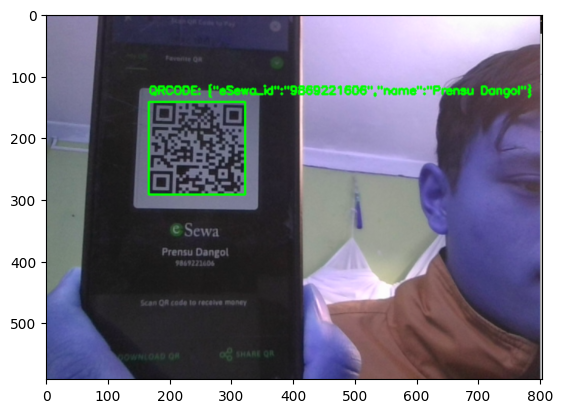

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image)